## Anfangswertaufgaben für gewöhnliche Differentialgleichungen

Gegeben sei eine Differentialgleichung in der Form:

$$\frac{df}{dt} = RHS(t,f)$$

Die rechte Seite der Gleichung $RHS$ lässt sich also als Steigung in Abhängigkeit von $t$ und $f$ interpretieren.

In unserem Beispiel sei die rechte Seite der Gleichung 

$$RHS(t,f) = \sqrt{(t+1)} \cdot \sin(f)$$

und damit

$$\frac{df}{dt} = \sqrt{(t+1)} \cdot \sin(f)$$

Auf einer $(f,t)$-Ebene lässt sich nun das zugehörige Richtungsfeld (Steigungsfeld) durch Auswerten der rechten Seite darstellen:

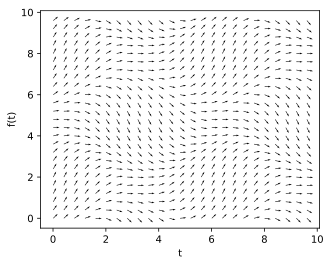

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# linke Seite der Gleichung (left hand side)
def RHS(t,f):
    return np.cos(t) + np.sin(f)

# Array mit äquidistanten Werten für lambda und Festlegen der Re-Zahl:
t = np.arange(0.01, 10, 0.4)
f = np.arange(0.0, 10, 0.4)
[gt,gf] = np.meshgrid(t,f)

# Vektoren des Richtungsfeldes
rt = 1 / np.sqrt(1 + RHS(gt, gf)**2)
rf = rt * RHS(gt, gf)

plt.figure(figsize=(5, 4))
plt.quiver(t,f,rt,rf, width=0.002)
plt.ylabel('f(t)')
plt.xlabel('t')
plt.show()

Soll nun eine spezielle Lösung der Differentialgleichung gefunden werden, so ist die Vorgabe von Anfangsbedingungen $t_0$ und $f(t_0)$ notwendig.

Ausgehend von dieser Anfangsbedingung lässt sich die Differentialgleichung integrieren. Hierzu stehen verschiedene Verfahren, wie Euler-Vorwärts, Euler-Rückwärts oder Runge-Kutta-Verfahren zur Verfügung.

### Euler-Vorwärts Verfahren (explizites Euler-Verfahren)

Beim [expliziten Euler-Verfahren](https://de.wikipedia.org/wiki/Explizites_Euler-Verfahren), wird im bereits bekannten Punkt $(t_i, f(t_i))$ die Steigung $m=RHS(t_i, f_i)$ berechnet und damit eine Gleichung der Tangente in diesem Punkt aufgestellt:

$$f(t) = f(t_i) + (t-t_i) \cdot m$$

Mit einer gewählten Zeitschrittweite $\Delta t$ ergibt sich somit der  Funktionswert zum nächsten Zeitpunkt durch

$$f(t_{i+1}) = f(t_i) + \Delta t \cdot RHS(f(t_i), t_i)$$

Das Verfahren weist einen lokalen Diskretisierungsfehler von der Konvergenzordnung $\mathcal O(\Delta t)$ auf. D.h. der Diskretisierungsfehler geht mit der Ordnung Eins gegen Null, wenn $\Delta T$ gegen Null geht. 

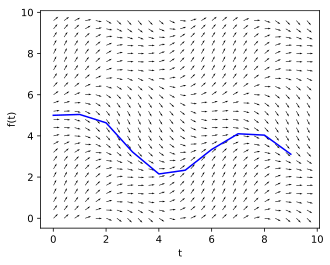

In [7]:
def Euler_explizit(rhs, t0, f0, t_max, delta_t):
    tis = np.arange(t0, t_max, delta_t)
    fis = np.empty_like(tis)
    for i, ti in enumerate(tis):
        if i == 0:
            fis[i] = f0
        else:
            fis[i] = fis[i-1] + delta_t * rhs(tis[i-1], fis[i-1])
    return tis, fis


tis, fis = Euler_explizit(RHS, t0=0.0, f0=5.0, t_max=10.0, delta_t=1)
plt.figure(figsize=(5, 4))
plt.plot(tis, fis, 'b', label='Euler explizit, $\Delta t = 1,0$')
#tis, fis = Euler_explizit(RHS, t0=0.0, f0=5.0, t_max=10.0, delta_t=0.1)
#plt.plot(tis, fis, 'g', label='Euler explizit, $\Delta t = 0,1$')

plt.quiver(t,f,rt,rf, width=0.002)
plt.ylabel('f(t)')
plt.xlabel('t')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Euler-Rückwärts Verfahren (implizites Euler-Verfahren)

Beim [impliziten Euler-Verfahren](https://de.wikipedia.org/wiki/Implizites_Euler-Verfahren) wird zur näherungsweisen Berechung des neuen Funktionswerts nicht die Steigung am bereits bekannten Punkt verwendet, sondern die Steigung am neu zu findenden Punkt. Es ergibt sich dadurch eine implizite Gleichung, die iterativ - z.B. mit dem Newton-Verfahren - zu jedem Zeitschritt gelöst werden muss:

$$f(t_{i+1}) = f(t_i) + \Delta t \cdot RHS(t_{i+1}, f(t_{i+1}))$$

### Runge-Kutta-Verfahren (4. Ordnung, explizit, RK4)

Das klassische [Runge-Kutta-Verfahren](https://de.wikipedia.org/wiki/Klassisches_Runge-Kutta-Verfahren) ist ein explizites Verfahren 4. Ordnung, das bei gleicher Schrittweite eine deutlich höhere Genauigkeit aufweist, als das explizite Euler Verfahren.

Erreicht wird dies durch zusätzliche Stützstellen in der Intervallmitte und am Intervallende, an denen ebenfalls die Steigung ermittelt wird: 

$\qquad\qquad m_1 = RHS\left(t_i, f_i)\right)$
    
$\qquad\qquad m_2 = RHS\left(t_i + \frac{\Delta t}{2}, f_i + \frac{\Delta t}{2} \cdot m_1\right)$

$\qquad\qquad m_3 = RHS\left(t_i + \frac{\Delta t}{2}, f_i + \frac{\Delta t}{2} \cdot m_2\right)$

$\qquad\qquad m_4 = RHS\left(t_i + \Delta t, f_i + \Delta t \cdot m_3\right)$

Über eine gewichtete Mittelung der Steigungen lässt sich der Funktionswert zum neuen Zeitpunkt dann genauer berechnen:

$$f(t_{i+1}) = f(t_i) + \frac{1}{6} \Delta t \cdot \left(m_1 + 2\cdot m_2 + 2\cdot m_3 + m_4\right)$$

Das Verfahren weist einen Diskretisierungsfehler von der Konvergenzordnung $\mathcal O(\Delta t^4)$ auf. D.h. der Diskretisierungsfehler geht mit 4. Ordnung gegen Null, wenn $\Delta T$ gegen Null geht. 

![](Runge-Kutta.pdf)

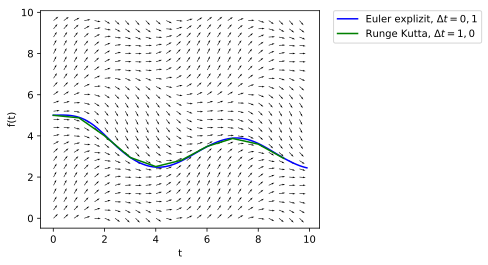

In [11]:
def RungeKutta4(rhs, t0, f0, t_max, delta_t):
    tis = np.arange(t0, t_max, delta_t)
    fis = np.empty_like(tis)
    for i, ti in enumerate(tis):
        if i == 0:
            fis[i] = f0
        else:
            m1 = rhs(tis[i-1], fis[i-1])
            m2 = rhs(tis[i-1]+0.5*delta_t, fis[i-1]+0.5*delta_t*m1)
            m3 = rhs(tis[i-1]+0.5*delta_t, fis[i-1]+0.5*delta_t*m2)
            m4 = rhs(tis[i-1]+delta_t, fis[i-1]+delta_t*m3)
            fis[i] = fis[i-1] + (1/6)* delta_t * (m1 + 2*m2+ 2*m3 + m4)
    return tis, fis

plt.figure(figsize=(5, 4))
tis, fis = Euler_explizit(RHS, t0=0.0, f0=5.0, t_max=10.0, delta_t=0.1)
plt.plot(tis, fis, 'b', label='Euler explizit, $\Delta t = 0,1$')
tis, fis = RungeKutta4(RHS, t0=0.0, f0=5.0, t_max=10.0, delta_t=1)
plt.plot(tis, fis, 'g', label='Runge Kutta, $\Delta t = 1,0$')

plt.quiver(t,f,rt,rf, width=0.002)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('f(t)')
plt.xlabel('t')
plt.show()

### Schrittweitensteuerung und das Runge-Kutta-Fehlberg Verfahren (RKF45)

Die in jedem Zeitschritt gemachten Fehler hängen entscheidend von der Schrittweite des Verfahrens ab. Ist die Schrittweite zu groß, wird der Diskretisierungsfehler groß (mit $\mathcal O(\Delta t^p)$). Andererseits gewinnen bei zu kleiner Schrittweite Rundungsfehler an Bedeutung. Es existiert also eine optimale Schrittweite für genauste Resultate.

Die Strategie in der Praxis ist, die Schrittweite möglichst groß zu wählen, so dass gerade noch die gewünschte Genauigkeit eingehalten wird. Die Schwierigkeit liegt dann darin, die Genauigkeit des Verfahrens abzuschätzen.

Eine gängige Methode dazu ist der Vergleich der Lösungen zweier Diskretisierungsverfahren, die sich in der Konvergenzordnung um 1 unterscheiden.

Ein häufig verwendetes Verfahren ist das Runge-Kutta-Fehlberg Verfahren, das ähnlich aufgebaut ist, wie das RK4-Verfahren. Es hat den Vorteil, dass die an den Zwischenstellen berechneten Steigungen sowohl in einem Verfahren 4. Ordnung als auch in einem mit 5. Ordnung verwendet werden können und somit der Rechenaufwand gering bleibt.

$m_1 = RHS\left[t_i, f_i\right]$

$m_2 = RHS\left[t_i + \frac{1}{4}\Delta t, f_i + \Delta t\cdot \frac{1}{4}m_1\right]$

$m_3 = RHS\left[t_i + \frac{3}{8}\Delta t, f_i + \Delta t\cdot\left(\frac{3}{32}m_1 + \frac{9}{32}m_2\right)\right]$

$m_4 = RHS\left[t_i + \frac{12}{13}\Delta t, f_i + \Delta t\cdot\left(\frac{1932}{2197}m_1 - \frac{7200}{2197}m_2 + \frac{7296}{2197}m_3\right)\right]$

$m_5 = RHS\left[t_i + \Delta t, f_i + \Delta t\cdot\left(\frac{439}{216}m_1 - 8 m_2 + \frac{3680}{513}m_3 - \frac{845}{4104}m_4\right)\right]$

$m_6 = RHS\left[t_i + \frac{1}{2}\Delta t, f_i + \Delta t\cdot\left(-\frac{8}{27}m_1 + 2 m_2 - \frac{3544}{2565}m_3 + \frac{1859}{4104}m_4 - \frac{11}{40}m_5\right)\right]$

Die Lösung mit einem Runge-Kutta-Verfahren 4. Ordnung ergibt sich dann aus:

$f^4(t_{i+1}) = f(t_i) + \Delta t \cdot \left(\frac{25}{216}m_1 + \frac{1408}{2565}m_3 + \frac{2197}{4101}m_4 - \frac{1}{5}m_5 \right)$

mit den vier Steigungen $m_1$, $m_3$, $m_4$ und $m_5$. Die Steigung $m_2$ wird für diese Lösung nicht benötigt.

Eine genauere Lösung wird mit dem Runge-Kutta-Verfahren 5. Ordnung berechnet:

$f^5(t_{i+1}) = f(t_i) + \Delta t \cdot \left(\frac{16}{135}m_1 + \frac{6656}{12825}m_3 + \frac{28561}{56430}m_4 - \frac{9}{50}m_5 + \frac{2}{55}m_6 \right)$

Die optimale Schrittweite lässt sich dann durch Multiplikation der aktuellen Schrittweite mit dem Skalar $s$ unter Angabe einer erlaubten Toleranz $tol$ ermitteln:

$s = \left(\frac{tol\cdot\Delta t_{alt}}{2\left|f^5(t_{i+1}) - f^4(t_{i+1}\right|}\right)^{1/4}$

$\Delta t_{neu} = s \cdot \Delta t_{alt}$

t =  1.000, f =  4.878, delta_t =  1.000
t =  2.504, f =  3.417, delta_t =  1.504
t =  3.679, f =  2.568, delta_t =  1.175
t =  5.095, f =  2.880, delta_t =  1.416
t =  6.329, f =  3.672, delta_t =  1.234
t =  7.659, f =  3.769, delta_t =  1.330
t =  9.404, f =  2.657, delta_t =  1.745
t = 10.419, f =  2.419, delta_t =  1.015


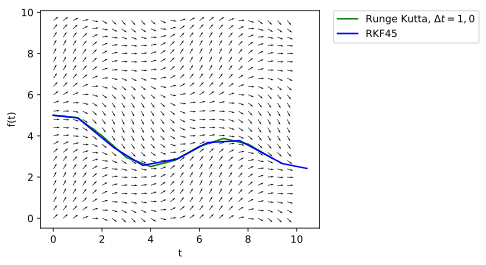

In [15]:
def RKF45(rhs, t0, f0, t_max, delta_t_start, tol):
    tis = []
    fis = []
    tis.append(t0)
    fis.append(f0)
    delta_t = delta_t_start
    while tis[-1] < t_max:
        m1 = rhs(tis[-1], fis[-1])
        m2 = rhs(tis[-1]+1/4*delta_t, fis[-1] + delta_t*1/4*m1)
        m3 = rhs(tis[-1]+3/8*delta_t, fis[-1]+ delta_t*(3/32*m1+9/32*m2))
        m4 = rhs(tis[-1]+12/13*delta_t, fis[-1]+ delta_t*(1932/2197*m1-7200/2197*m2+7296/2197*m3))
        m5 = rhs(tis[-1]+delta_t, fis[-1]+ delta_t*(439/216*m1-8*m2+3680/513*m3-845/4104*m4))
        m6 = rhs(tis[-1]+1/2*delta_t, fis[-1]+ delta_t*(-8/27*m1+2*m2-3544/2565*m3+1859/4104*m4-11/40*m5))
        fo4 = fis[-1] + delta_t * (25/216*m1+1408/2565*m3+2197/4101*m4-1/5*m5)
        fo5 = fis[-1] + delta_t * (16/135*m1+6656/12825*m3+28561/56430*m4-9/50*m5+2/55*m6)
        tis.append(tis[-1]+delta_t)
        fis.append(fo5)
        print ("t = %6.3f, f = %6.3f, delta_t = %6.3f" % (tis[-1], fis[-1], delta_t))
        
        #neue Zeitschrittweite:
        s = (tol*delta_t/(2*abs(fo5-fo4)))**0.25
        delta_t = max(delta_t*s, 0.01 * delta_t_start)
        
    return np.array(tis), np.array(fis)

plt.figure(figsize=(5, 4))
tis, fis = RungeKutta4(RHS, t0=0.0, f0=5.0, t_max=10.0, delta_t=1)
plt.plot(tis, fis, 'g', label='Runge Kutta, $\Delta t = 1,0$')

tis, fis = RKF45(RHS, t0=0.0, f0=5.0, t_max=10.0, delta_t_start=1, tol=0.002)
plt.plot(tis, fis, 'b', label='RKF45')

plt.quiver(t,f,rt,rf, width=0.002)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('f(t)')
plt.xlabel('t')
plt.show()

### Differentialgleichungen höherer Ordnung

Differentialgleichungen höherer Ordnung lassen sich in ein System von Differentialgleichungen 1. Ordnung umschreiben und dann mit den bereits vorgestellten Verfahren lösen.

Als Beispiel dient die Differentialgleichung für ein einfaches Punktmassenpendel:

![](Pendel.pdf)

$$m\cdot l^2 \cdot \ddot{\varphi}(t) = -m\cdot g\cdot l \sin \varphi(t)$$

bzw.

$$\ddot{\varphi}(t) = -\frac{g}{l} \cdot \sin \varphi(t)$$

mit dem Anfangswinkel $\varphi(0) = \varphi_0$ und der Anfangswinkelgeschwindigkeit $\dot\varphi(0) = \dot\varphi_0$.

Durch Einführung der Variablen $z_1(t) = \varphi(t)$ und $z_2 = \dot\varphi(t)$ kann die Differentialgleichung in ein DGL-System 1. Ordnung überführt werden:

$$\dot z_1 = z_2$$

$$\dot z_2 = -\frac{g}{l} \cdot \sin z_1(t)$$

mit den Anfangswerten $z_1(0) = \varphi_0$ und $z_2(0) = \dot\varphi_0$.

Dieses lässt sich nun einfach z.B. mit dem Euler-Verfahren lösen:

$$\vec{z_k}(t_{i+1}) = \vec{z_k}(t_i) + \Delta t \cdot \vec{\dot{z_k}}$$

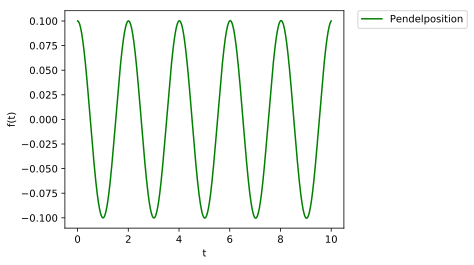

In [19]:
def Euler_System(rhs, t0, phi0, phidot0, t_max, delta_t):
    tis = np.arange(t0, t_max, delta_t)
    z1is = np.empty_like(tis)
    z2is = np.empty_like(tis)
    for i, ti in enumerate(tis):
        if i == 0:
            z1is[i] = phi0
            z2is[i] = phidot0
        else:
            z1is[i] = z1is[i-1] + delta_t * z2is[i-1]
            z2is[i] = z2is[i-1] + delta_t * rhs(z1is[i-1])

    return tis, z1is, z2is

def RHS(phi):
    g = 9.81
    l = 1.0
    return -g/l * math.sin(phi)

tis, phis, phidots = Euler_System(RHS, t0=0.0, phi0=0.0, phidot0=0.1, t_max=10.0, 
                                  delta_t=0.0001)
plt.figure(figsize=(5, 4))
plt.plot(tis, phidots, 'g', label='Pendelposition')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('f(t)')
plt.xlabel('t')
plt.show()

Die Lösung sieht schön aus, ist aber falsch. In der Realität müsste die Amplitude bei dem reibungsfreien Pendel immer konstant bleiben. Die Ursache für den oben gezeigten falschen Amplitudenverlauf ist eine zu groß gewählte Zeitschrittweite (`delta_t = 0.1`). 

Wählen wir eine 100-fach kleinere Zeitschrittweite ergibt sich dagegen folgender Verlauf:

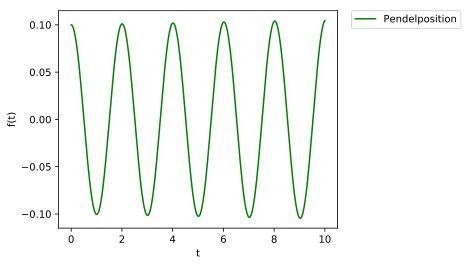

In [9]:
tis, phis, phidots = Euler_System(RHS, t0=0.0, phi0=0.0, phidot0=0.1, t_max=10.0, 
                                  delta_t=0.001)
plt.figure(figsize=(5, 4))
plt.plot(tis, phidots, 'g', label='Pendelposition')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('f(t)')
plt.xlabel('t')
plt.show()

[Hier](1_4-Numerik - Randwertaufgaben.ipynb) geht's weiter oder [hier](index.ipynb) zurück zur Übersicht.


---
###### Copyright (c) 2017, Florian Theobald und Matthias Stripf

Der folgende Python-Code darf ignoriert werden. Er dient nur dazu, die richtige Formatvorlage für die Jupyter-Notebooks zu laden.

In [8]:
from IPython.core.display import HTML
def css_styling():
    styles = open('TFDStyle.css', 'r').read()
    return HTML(styles)
css_styling()